# Exploratory Data Analysis

## This contains the EDA of the Beer Info Dataset.

**Importing Default Python Libraries**

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import pickle
import re

%matplotlib inline

**Loading the Dataset and having a glance at the dataset**

In [2]:
beer_info = pd.read_csv("../raw_data/Beer_info_data/beer_info_clean.csv")
beer_info.head(3)

,state,beer_rank,beer_name,beer_style,brewer,review_count,overall_score,style_score,wgt_avg,abv,est_cal,mean,ibu,beer_desc,beer_img
0,ALABAMA,1,Good People El Gordo Imperial Stout,Imperial Stout,Good People Brewing Company,15,99.0,90.0,3.89,13.9,417.0,4.13,65.0,NaN,http://res.cloudinary.com/ratebeer/image/uploa...
1,ALABAMA,2,Straight To Ale Laika Russian Imperial Stout -...,Imperial Stout,Straight To Ale,53,98.0,72.0,NaN,11.7,351.0,NaN,NaN,NaN,http://res.cloudinary.com/ratebeer/image/uploa...
2,ALABAMA,3,Straight To Ale Laika Russian Imperial Stout,Imperial Stout,Straight To Ale,55,97.0,71.0,NaN,NaN,74.0,NaN,NaN,"Second offering from the ""Right to Brew"" serie...",http://res.cloudinary.com/ratebeer/image/uploa...


**After having a glipse at the dataset it was very much needed to check the data types and making required changes as below mentioned variables are changed to numeric.**

In [3]:
beer_info[["wgt_avg", "est_cal", "ibu"]] = beer_info[["wgt_avg", "est_cal", "ibu"]].apply(pd.to_numeric)
print beer_info.dtypes

state             object
beer_rank          int64
beer_name         object
beer_style        object
brewer            object
review_count       int64
overall_score    float64
style_score      float64
wgt_avg          float64
abv              float64
est_cal          float64
mean             float64
ibu              float64
beer_desc         object
beer_img          object
dtype: object


**Following are the details of the EDA**
- First we are going to look at the counts of the dataset

In [5]:
beer_info.count()

state            1275
beer_rank        1275
beer_name        1275
beer_style       1275
brewer           1275
review_count     1275
overall_score    1267
style_score      1230
wgt_avg           533
abv               629
est_cal           846
mean              533
ibu               597
beer_desc        1150
beer_img         1275
dtype: int64

In [6]:
a = beer_info["overall_score"]
overall_score = a[a.notnull()]

In [7]:
b = beer_info["style_score"]
style_score = b[b.notnull()]

In [8]:
print a,b

0        99.0
1        98.0
2        97.0
3        97.0
4        96.0
5        96.0
6        96.0
7        95.0
8        95.0
9        94.0
10       94.0
11       93.0
12       92.0
13       91.0
14       91.0
15       91.0
16       90.0
17       90.0
18       89.0
19       88.0
20       87.0
21       86.0
22       85.0
23       85.0
24       85.0
25      100.0
26      100.0
27      100.0
28      100.0
29      100.0
        ...  
1245     99.0
1246     99.0
1247     99.0
1248     99.0
1249     99.0
1250     99.0
1251     99.0
1252     99.0
1253     98.0
1254     98.0
1255     97.0
1256     97.0
1257     97.0
1258     96.0
1259     95.0
1260     95.0
1261     93.0
1262     91.0
1263     84.0
1264     84.0
1265     83.0
1266     83.0
1267     81.0
1268     74.0
1269     73.0
1270     73.0
1271     73.0
1272     70.0
1273     68.0
1274     67.0
Name: overall_score, Length: 1275, dtype: float64 0        90.0
1        72.0
2        71.0
3        95.0
4        58.0
5        84.0
6        82.

**Now its important to see the total number of reviews for these beers**

In [9]:
beer_info.review_count.sum()

278066

In [10]:
beer_info.describe()

,beer_rank,review_count,overall_score,style_score,wgt_avg,abv,est_cal,mean,ibu
count,1275.000000,1275.000000,1267.000000,1230.000000,533.000000,629.000000,846.000000,533.000000,597.000000
mean,13.000000,218.090980,93.996054,87.956098,3.654221,9.084229,217.541371,3.817674,185.068677
std,7.213932,472.287771,12.797085,17.722057,0.297965,2.803233,119.743928,0.334202,117.905976
min,1.000000,5.000000,0.000000,9.000000,2.550000,3.100000,6.000000,2.300000,4.000000
25%,7.000000,23.000000,95.000000,85.000000,3.480000,6.800000,115.500000,3.640000,72.000000
50%,13.000000,54.000000,99.000000,96.000000,3.680000,9.000000,225.000000,3.840000,186.000000
75%,19.000000,175.000000,100.000000,99.000000,3.870000,11.000000,300.000000,4.050000,267.000000
max,25.000000,4598.000000,100.000000,100.000000,4.310000,18.500000,555.000000,4.560000,810.000000


In [11]:
beer_info.describe().round(2)

,beer_rank,review_count,overall_score,style_score,wgt_avg,abv,est_cal,mean,ibu
count,1275.00,1275.00,1267.0,1230.00,533.00,629.00,846.00,533.00,597.00
mean,13.00,218.09,94.0,87.96,3.65,9.08,217.54,3.82,185.07
std,7.21,472.29,12.8,17.72,0.30,2.80,119.74,0.33,117.91
min,1.00,5.00,0.0,9.00,2.55,3.10,6.00,2.30,4.00
25%,7.00,23.00,95.0,85.00,3.48,6.80,115.50,3.64,72.00
50%,13.00,54.00,99.0,96.00,3.68,9.00,225.00,3.84,186.00
75%,19.00,175.00,100.0,99.00,3.87,11.00,300.00,4.05,267.00
max,25.00,4598.00,100.0,100.00,4.31,18.50,555.00,4.56,810.00


**And next step is to count the number of breweries and checking which one brews highest number of beers.**

- There are total of 355 breweries. 

In [12]:
brewer_counts = beer_info['brewer'].value_counts()
pd.DataFrame({'count': brewer_counts})

,count
Toppling Goliath,22
Three Floyds Brewing Company,22
Hill Farmstead Brewery,21
Westbrook Brewing,21
Prairie Artisan Ales,21
Superstition Meadery,17
Nebraska Brewing Company,16
Dogfish Head Brewery,15
Wicked Weed Brewing,15
Trillium Brewing Company,14


**And more to see the info, we dig at `Beer Style` and find out which beer style is most famous.**

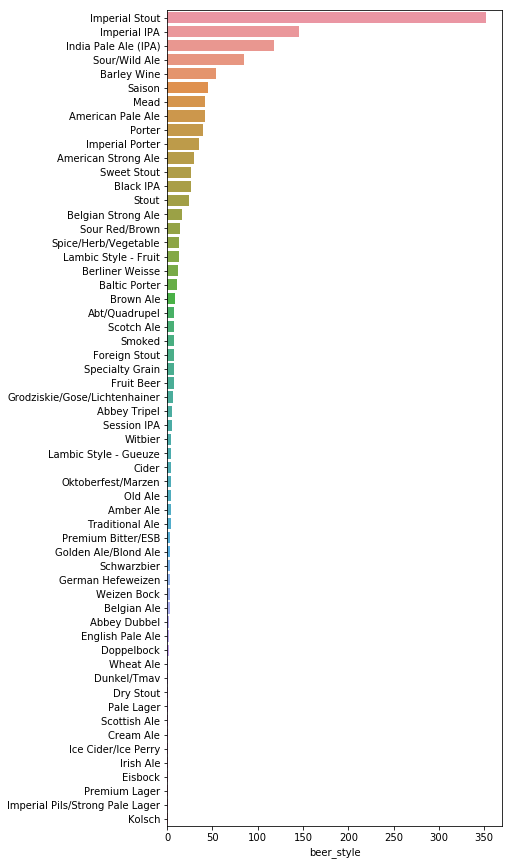

In [13]:
f, ax = plt.subplots(figsize = (6,15))
style_sns = sns.barplot(x = beer_info.beer_style.value_counts(), y = beer_info.beer_style.value_counts().index,
                       orient = 'h')


In [14]:
print beer_info.beer_style.value_counts()

Imperial Stout                     352
Imperial IPA                       146
India Pale Ale (IPA)               118
Sour/Wild Ale                       85
Barley Wine                         54
Saison                              45
Mead                                42
American Pale Ale                   42
Porter                              40
Imperial Porter                     35
American Strong Ale                 30
Sweet Stout                         26
Black IPA                           26
Stout                               24
Belgian Strong Ale                  16
Sour Red/Brown                      14
Spice/Herb/Vegetable                13
Lambic Style - Fruit                13
Berliner Weisse                     12
Baltic Porter                       11
Brown Ale                            9
Abt/Quadrupel                        7
Scotch Ale                           7
Smoked                               7
Foreign Stout                        7
Specialty Grain          

**As we saw earlier that missing values are more in variables `wgt_avg`, `abv`, `ibu`, `est_cal` and `mean`, hence to get more insights from them, violin plot is used.**

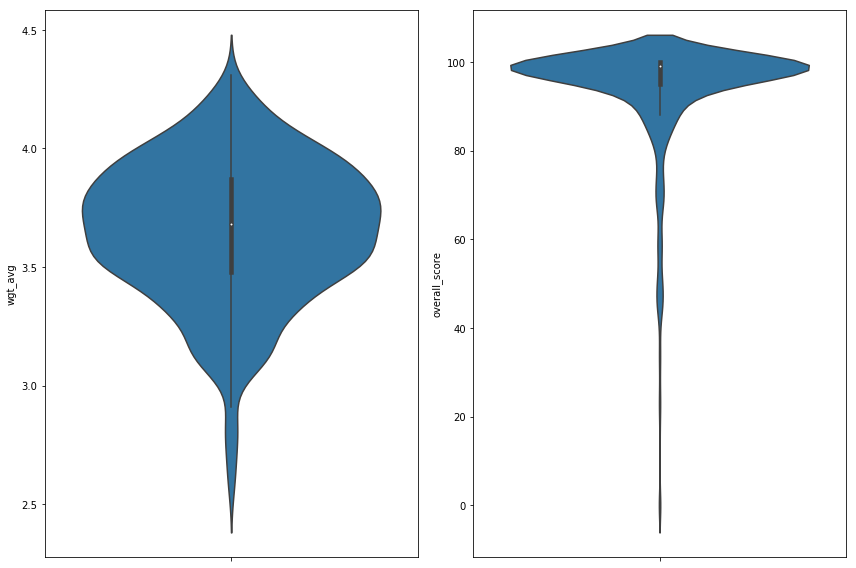

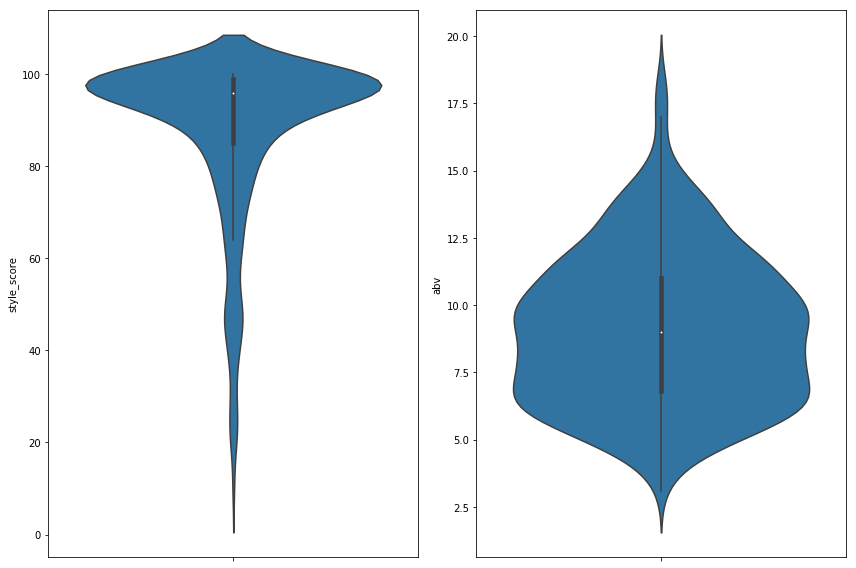

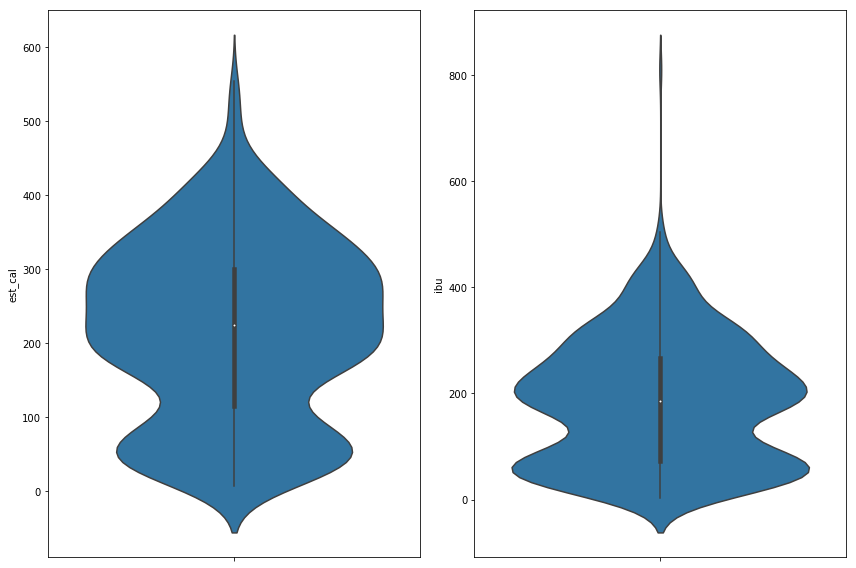

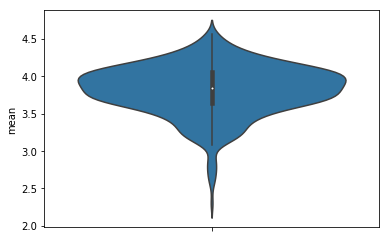

In [27]:
col_names = ['wgt_avg', 'overall_score', 'style_score', 'abv', 'est_cal', 'ibu', 'mean']
for i in range(0,len(col_names),2):
    if len(col_names) > i+1:
        plt.figure(figsize=(12,8))
        plt.subplot(121)
        sns.violinplot(beer_info[col_names[i]], orient='v')
        plt.subplot(122)            
        sns.violinplot(beer_info[col_names[i+1]], orient='v')
        plt.tight_layout()
        plt.show()
    else:
        sns.violinplot(beer_info[col_names[i]], orient='v')

### Inferences from the Violin plot

- The weighted average looks normal with mean around 3.7
- The Overall core and style score are heavliy skewed towards 100
- The % abv has a median between 8 and 9, and ranging from a bit under 2.5 % abv to close to 20 % abv.
- F or estimated calories we have two peaks, one around 50 calories and one around 250 calories.
- This is perhaps a separation between so-called light beers and heavier beers